In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2 
import keras
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from tensorflow.keras import backend as K
from keras.applications import xception
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Softmax
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# Importing and Exploring Data

In [2]:
batch_size = 32
img_height = 256
img_width = 256
data_dir='/Users/anishamalhotra/Desktop/Images'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [5]:
images = np.zeros((32,256,256,3))
labels = np.zeros((32,))
for image, label in train_ds:
    images = image
    labels = label
    print(image.shape)
    print(label.shape)
    break

(32, 256, 256, 3)
(32,)


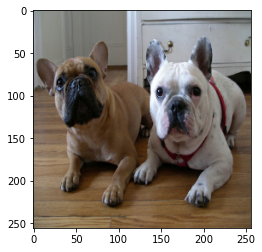

In [6]:
plt.imshow(images[0]/255.)

In [7]:
class_names = train_ds.class_names
class_names

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

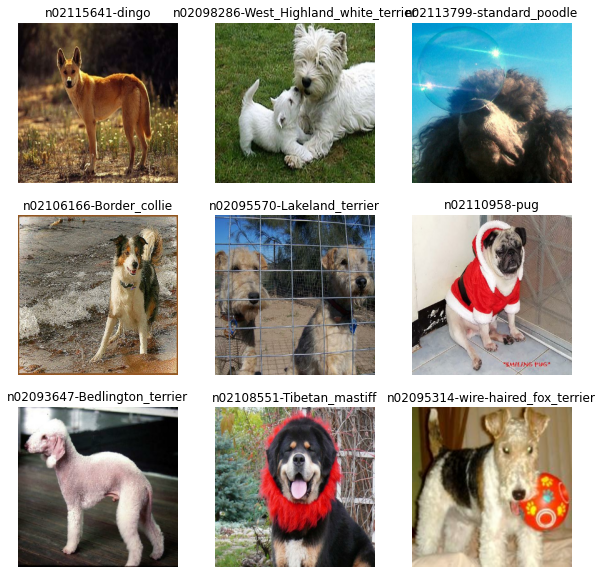

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

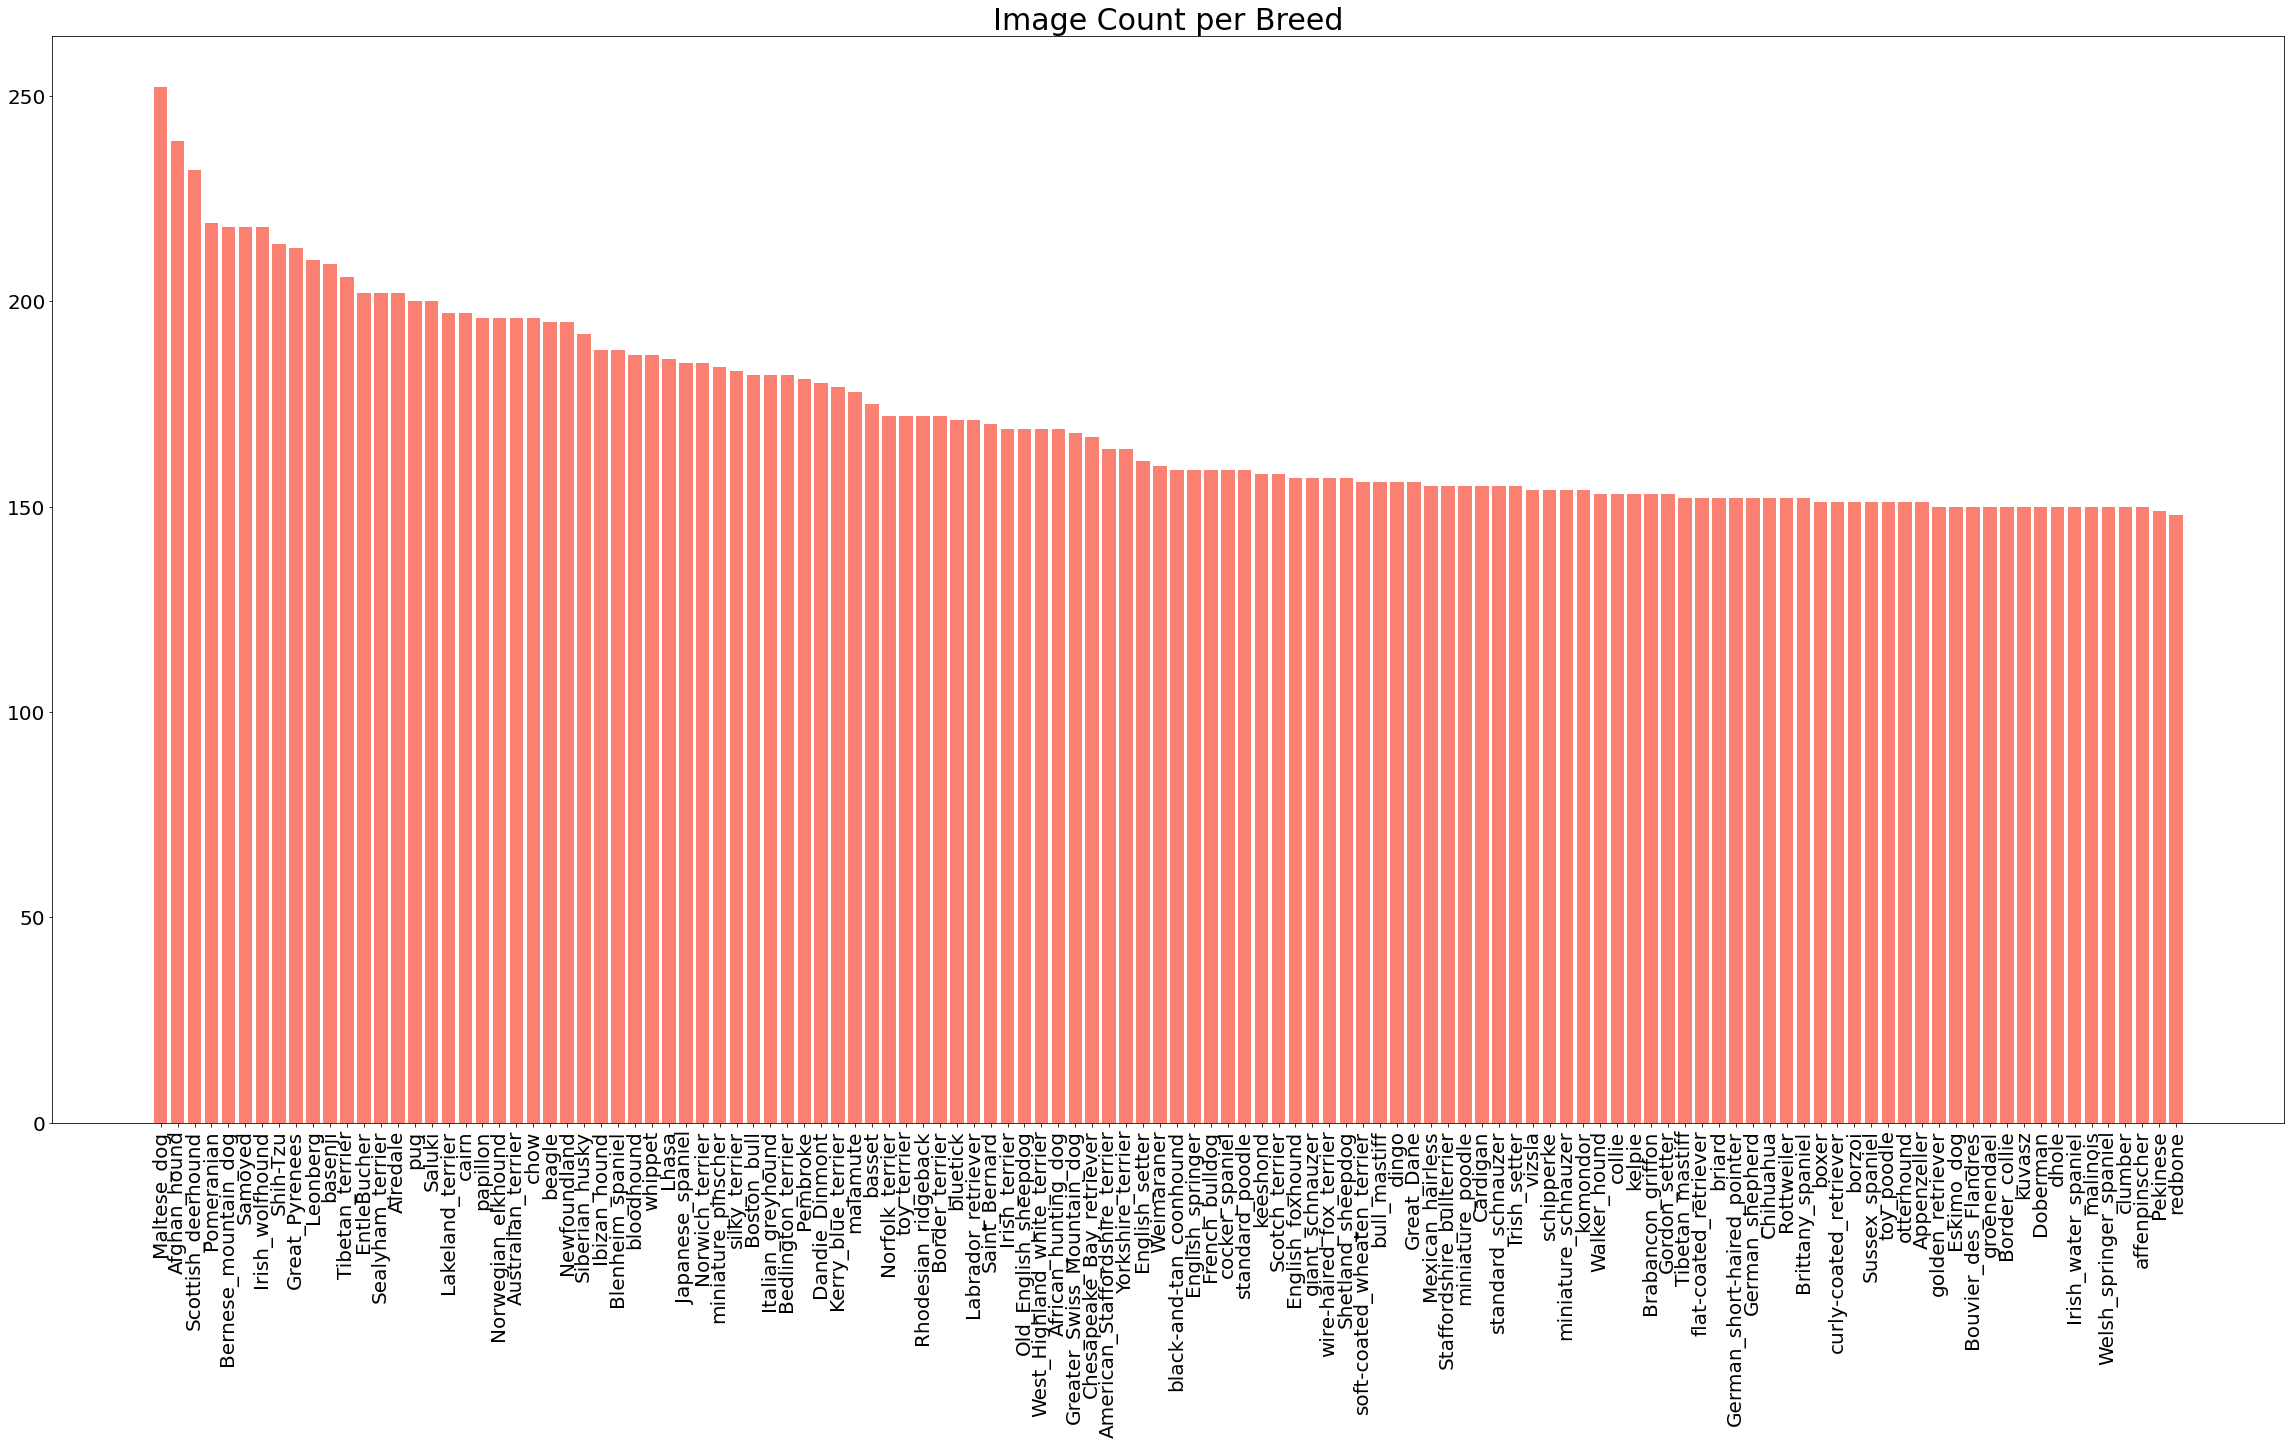

In [11]:
df = pd.DataFrame(sorted(glob.glob('/Users/anishamalhotra/Desktop/Images/*/*')), columns = ['path'])
df['labels'] = df['path'].apply(lambda x: x.split('/')[-2].split('-',1)[1])

breeds = df['labels'].value_counts()
ax, fig = plt.subplots(figsize = (40,20))
plt.bar(breeds.index, breeds.values, color = 'salmon')
plt.xticks(breeds.index, rotation=90, fontsize=20)
plt.title('Image Count per Breed', fontsize = 30)
plt.yticks(fontsize = 20)

# Scaling

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                   zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(256, 256),
                                                    batch_size=32)
test_generator = test_datagen.flow_from_directory(data_dir, target_size=(256, 256),
                                                        batch_size=32)

Found 20580 images belonging to 120 classes.
Found 20580 images belonging to 120 classes.


In [14]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32, 120)


# Modeling

### Model 2 

In [17]:
model_2 = tf.keras.Sequential([
  layers.Conv2D(16, 3, activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(120, activation='relu')])

In [18]:
model_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [19]:
model_2.fit(
        train_generator,
        epochs=3,
        validation_data=test_generator)

Epoch 1/3
644/644 [==============================] - 1012s 2s/step - loss: 14.5163 - accuracy: 0.0136 - val_loss: 14.4943 - val_accuracy: 0.0207
Epoch 2/3
644/644 [==============================] - 980s 2s/step - loss: 14.5020 - accuracy: 0.0143 - val_loss: 14.4939 - val_accuracy: 0.0173
Epoch 3/3
644/644 [==============================] - 981s 2s/step - loss: 14.4937 - accuracy: 0.0176 - val_loss: 14.4967 - val_accuracy: 0.0188


### Model 3

In [20]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same', 
                          input_shape=(256,256,3), data_format = 'channels_last'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(Dropout(0.2))

model_3.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(Dropout(0.2))

model_3.add(Flatten())
model_3.add(Dropout(0.2))
model_3.add(Dense(120, activation = 'softmax'))

In [21]:
model_3.compile(loss='categorical_crossentropy', 
                optimizer = 'adam', 
                metrics = ['accuracy'])


In [ ]:
model_3.summary()

In [22]:
model_3.fit(
        train_generator,
        epochs=3,
        validation_data=test_generator)

Epoch 1/3
644/644 [==============================] - 1014s 2s/step - loss: 4.7328 - accuracy: 0.0167 - val_loss: 4.5862 - val_accuracy: 0.0306
Epoch 2/3
644/644 [==============================] - 1011s 2s/step - loss: 4.5173 - accuracy: 0.0372 - val_loss: 4.3444 - val_accuracy: 0.0603
Epoch 3/3
644/644 [==============================] - 1002s 2s/step - loss: 4.2933 - accuracy: 0.0598 - val_loss: 4.0357 - val_accuracy: 0.0981


### Transfer Learning

In [23]:
inputs = keras.Input(shape=(256, 256, 3))

base_model = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(256, 256, 3),
    include_top=False)

base_model.trainable = False

x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(120, activation='softmax')(x)

model = keras.Model(base_model.input, outputs)

for layer in base_model.layers:
    layer.trainable = False


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [25]:
history = model.fit(
        train_generator,
        epochs=3,
        validation_data=test_generator)

Epoch 1/3
644/644 [==============================] - 4038s 6s/step - loss: 1.6337 - accuracy: 0.6648 - val_loss: 0.9177 - val_accuracy: 0.7944
Epoch 2/3
644/644 [==============================] - 3972s 6s/step - loss: 1.0572 - accuracy: 0.7562 - val_loss: 0.6995 - val_accuracy: 0.8237
Epoch 3/3
644/644 [==============================] - 3909s 6s/step - loss: 0.8441 - accuracy: 0.7873 - val_loss: 0.5742 - val_accuracy: 0.8475


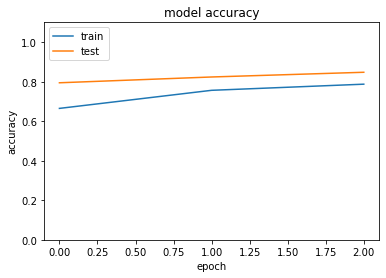

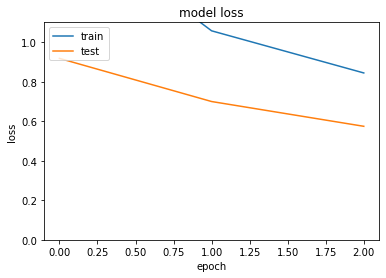

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

# M7

In [27]:
model_cnn = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256,256,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(120)
])

In [29]:
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
epochs=3
model_cnn.fit(
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)

Epoch 1/3
644/644 [==============================] - 1324s 2s/step - loss: 8.3280 - accuracy: 0.0074 - val_loss: 8.3755 - val_accuracy: 0.0074
Epoch 2/3
644/644 [==============================] - 1109s 2s/step - loss: 8.3754 - accuracy: 0.0074 - val_loss: 8.3755 - val_accuracy: 0.0074
Epoch 3/3
644/644 [==============================] - 1106s 2s/step - loss: 8.3755 - accuracy: 0.0074 - val_loss: 8.3754 - val_accuracy: 0.0074


### M21

In [31]:
model_2lr = Sequential()
model_2lr.add(layers.Flatten())
model_2lr.add(Dense(1000, activation = 'tanh', input_shape=(256,256,3)))
model_2lr.add(Dropout(0.25))
model_2lr.add(Dense(750, activation = 'tanh'))
model_2lr.add(Dense(500, activation = 'tanh'))
model_2lr.add(Dropout(0.25))
model_2lr.add(Dense(240, activation = 'tanh'))
model_2lr.add(Dense(120, kernel_regularizer=regularizers.l2(0.01), activation = 'softmax'))

In [32]:
model_2lr.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [33]:
model_2lr.fit(
        train_generator,
        epochs=3,
        validation_data=test_generator)

Epoch 1/3
644/644 [==============================] - 1046s 2s/step - loss: 5.6136 - accuracy: 0.0090 - val_loss: 5.1420 - val_accuracy: 0.0087
Epoch 2/3
644/644 [==============================] - 1026s 2s/step - loss: 5.0229 - accuracy: 0.0091 - val_loss: 4.9334 - val_accuracy: 0.0075
Epoch 3/3
644/644 [==============================] - 1012s 2s/step - loss: 4.9153 - accuracy: 0.0086 - val_loss: 4.8863 - val_accuracy: 0.0106


### Model 2H

In [ ]:
model_2h = Sequential()
model_2h.add(Dense(1000, activation = 'tanh', input_shape = (256,256,3)))
model_2h.add(Flatten())
model_2h.add(Dropout(0.25))
model_2h.add(Dense(750, activation = 'relu'))
model_2h.add(Dense(500, activation = 'tanh'))
model_2h.add(Dropout(0.25))
model_2h.add(Dense(240, activation = 'relu'))
model_2h.add(Dense(120, kernel_regularizer=regularizers.l2(0.01), activation = 'softmax'))
model_2h.summary()

In [ ]:
model_2h.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
model_2h.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator)